# Objective Evaluations

## MCD Calculations

In [1]:
!pip install -U pymcd

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 797.6 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512583 sha256=88afdaa071df3c961aaf8fe380984872856619eca7a7ce680c02e6409666c609
  Stored in directory: /home/aine_linux/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [96]:
from pymcd.mcd import Calculate_MCD

# three different modes "plain", "dtw" and "dtw_sl" for the above three MCD metricscd che
mcd_toolbox = Calculate_MCD(MCD_mode="plain")
#reference audio resampling is provided below

# two inputs w.r.t. reference (ground-truth) and synthesized speeches, respectively
mcd_value = mcd_toolbox.calculate_mcd("default_out.wav", "resampled_reference_audio_mono.wav")

In [97]:
print(mcd_value)

22.43200442843981


## F0 RMSE  

In [80]:
import librosa

audio_file = 'resampled_reference_audio.wav'
y, sr = librosa.load(audio_file, sr=None)  # Set sr=None to get the original sample rate

print(f"Sample rate: {sr} Hz")

Sample rate: 24000 Hz


In [67]:
import librosa

ref_audio, _ = sf.read('reference_audio.wav')
# Resample from 44100 Hz to 24000 Hz
ref_audio_resampled = librosa.resample(ref_audio, orig_sr=44100, target_sr=24000)


In [70]:
from scipy.signal import resample
import soundfile as sf

# Calculate the number of samples at the new sampling rate
num_samples = int(len(ref_audio) * float(24000) / 44100)

# Resample the audio
ref_audio_resampled = resample(ref_audio, num_samples)

sf.write('resampled_reference_audio.wav', ref_audio_resampled, 24000)


In [83]:
# Check if the resampled audio is two-dimensional
if ref_audio_resampled.ndim == 2:
    # Convert stereo to mono by averaging the two channels
    ref_audio_mono = np.mean(ref_audio_resampled, axis=1)
else:
    ref_audio_mono = ref_audio_resampled

# Now you can save the mono audio
sf.write('resampled_reference_audio_mono.wav', ref_audio_mono, 24000)

# And use it with PyWorld
ref_f0, _ = pw.dio(ref_audio_mono, fs=24000)


In [89]:
import numpy as np
import pyworld as pw
import soundfile as sf

# Load and process your reference and synthesized audio files
ref_audio, _ = sf.read('resampled_reference_audio_mono.wav')
syn_audio, _ = sf.read('hifi_out.wav')

# Determine the minimum length of both audio files
min_length = min(len(ref_audio), len(syn_audio))

# Trim both audio files to the same length (cut or padding?)
ref_audio = ref_audio[:min_length]
syn_audio = syn_audio[:min_length]

# Extract F0 contours using the DIO method from PyWorld (adjust fs as needed)
ref_f0, _ = pw.dio(ref_audio, fs=24000)
syn_f0, _ = pw.dio(syn_audio, fs=24000)

# Calculate the RMSE between the F0 contours
f0_rmse = np.sqrt(np.mean((ref_f0 - syn_f0) ** 2))

print(f"F0 RMSE: {f0_rmse:.2f} Hz")


F0 RMSE: 134.01 Hz


## Data Visualization

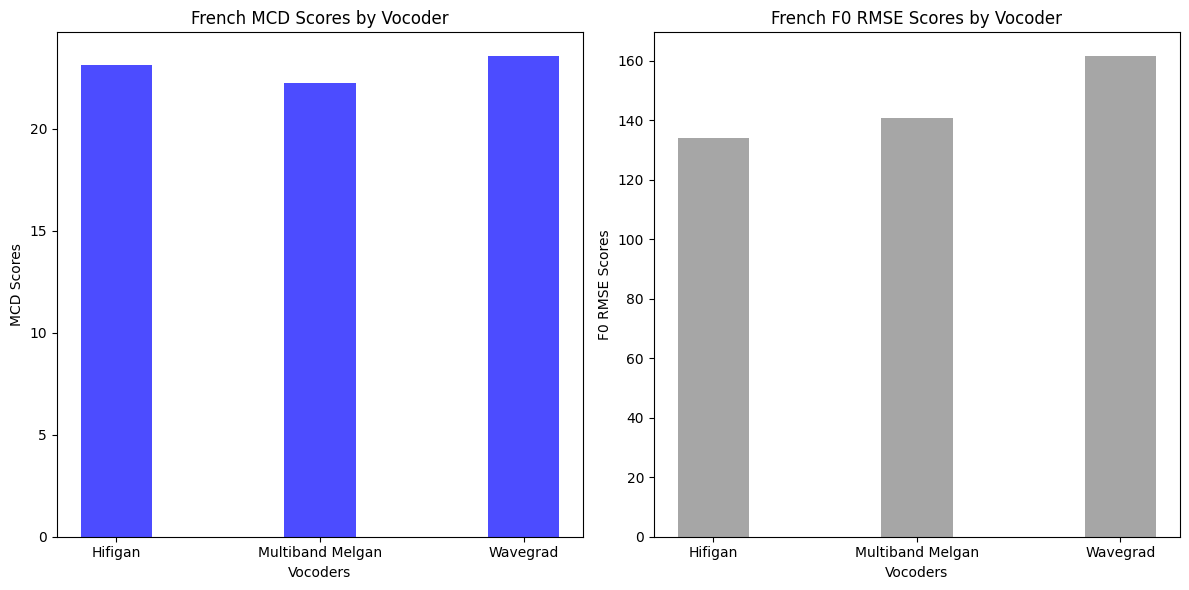

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# French MCD scores for each vocoder
vocoder_names = ["Hifigan", "Multiband Melgan", "Wavegrad"]
french_mcd_scores = [23.12037395627331, 22.245349153418047, 23.549868964709674]

# French F0 RMSE scores for each vocoder
french_f0_rmse_scores = [134.01 ,140.55 ,161.40]

num_vocoders = len(vocoder_names)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
bar_width = 0.35

ax1.bar(np.arange(num_vocoders), french_mcd_scores, bar_width, alpha=0.7, color='b')
ax1.set_xlabel('Vocoders')
ax1.set_ylabel('MCD Scores')
ax1.set_title('French MCD Scores by Vocoder')
ax1.set_xticks(np.arange(num_vocoders))
ax1.set_xticklabels(vocoder_names)

ax2.bar(np.arange(num_vocoders), french_f0_rmse_scores, bar_width, alpha=0.7, color='grey')
ax2.set_xlabel('Vocoders')
ax2.set_ylabel('F0 RMSE Scores')
ax2.set_title('French F0 RMSE Scores by Vocoder')
ax2.set_xticks(np.arange(num_vocoders))
ax2.set_xticklabels(vocoder_names)

plt.tight_layout()

plt.show()
